In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
#loading the dataset using pandas
df=pd.read_csv("/content/Housing 2.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<ipython-input-6-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

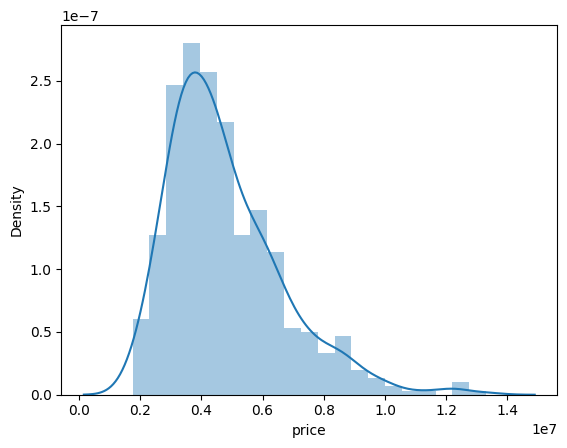

In [6]:
sns.distplot(df["price"])

In [7]:
#Identifying the missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.notnull().sum()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [9]:
df.shape

(545, 13)

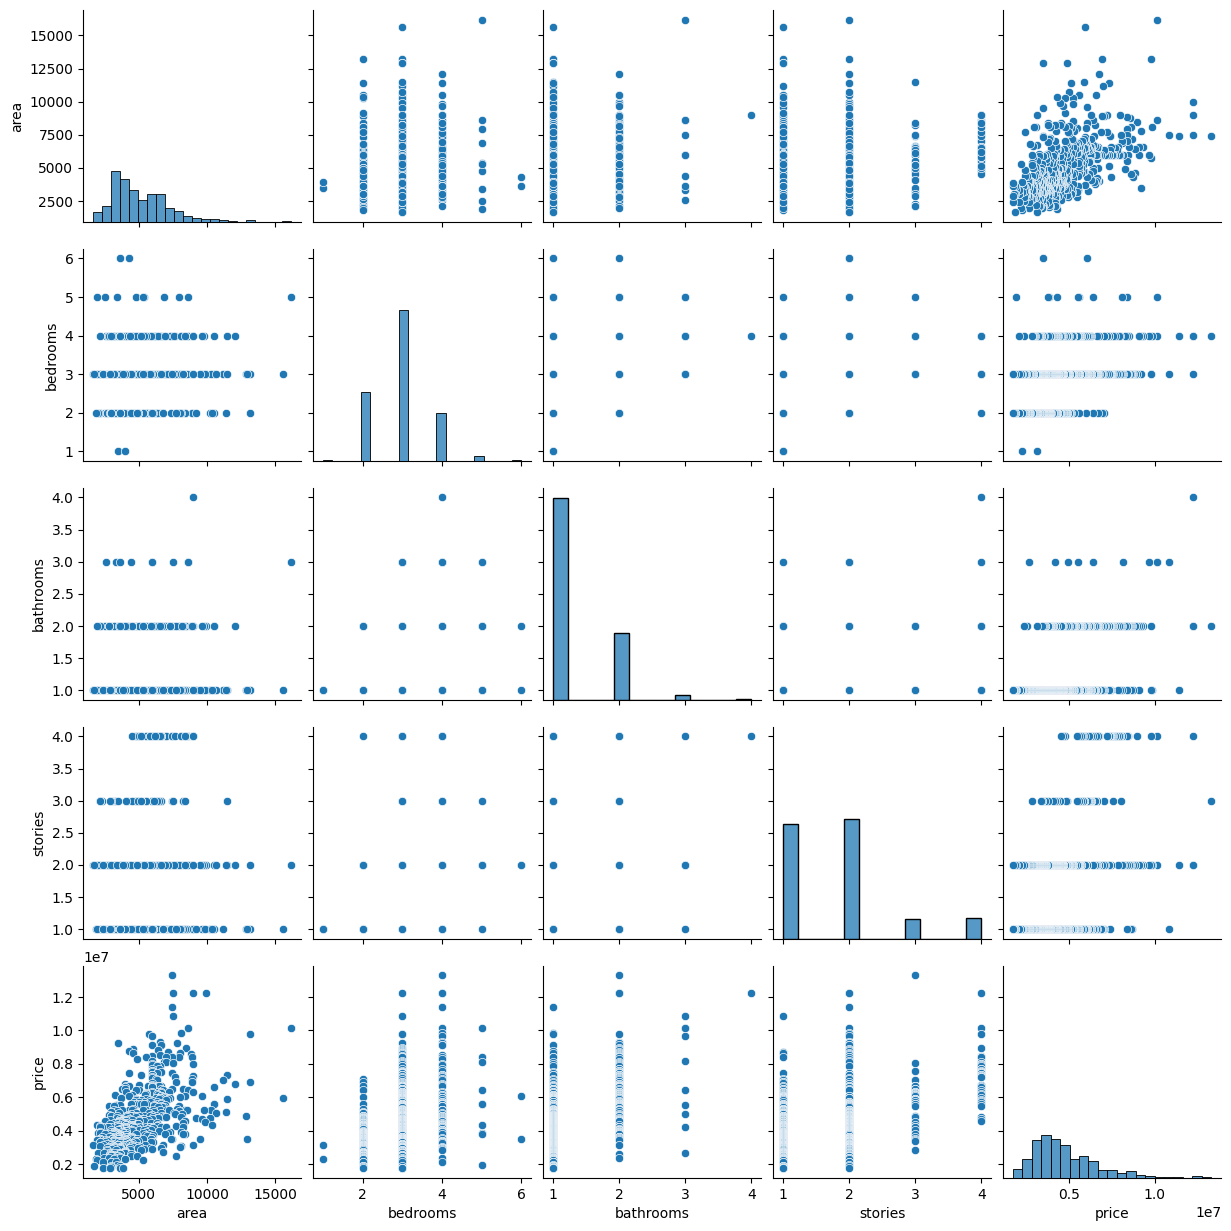

In [10]:
sns.pairplot(vars=['area','bedrooms','bathrooms','stories','price'],data=df)


<Axes: xlabel='bedrooms', ylabel='price'>

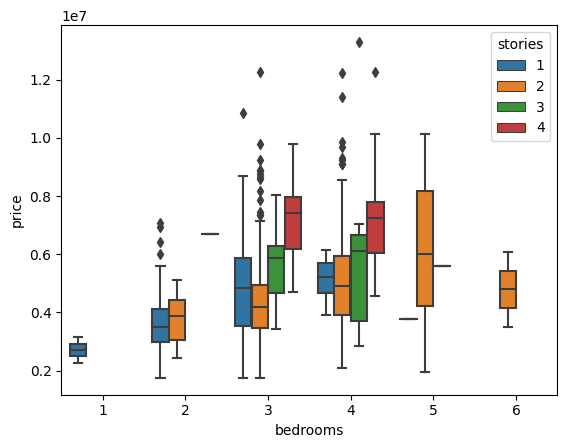

In [12]:
#Detecting the outliers
sns.boxplot(x=df["bedrooms"],
           y=df["price"],
           hue=df["stories"])


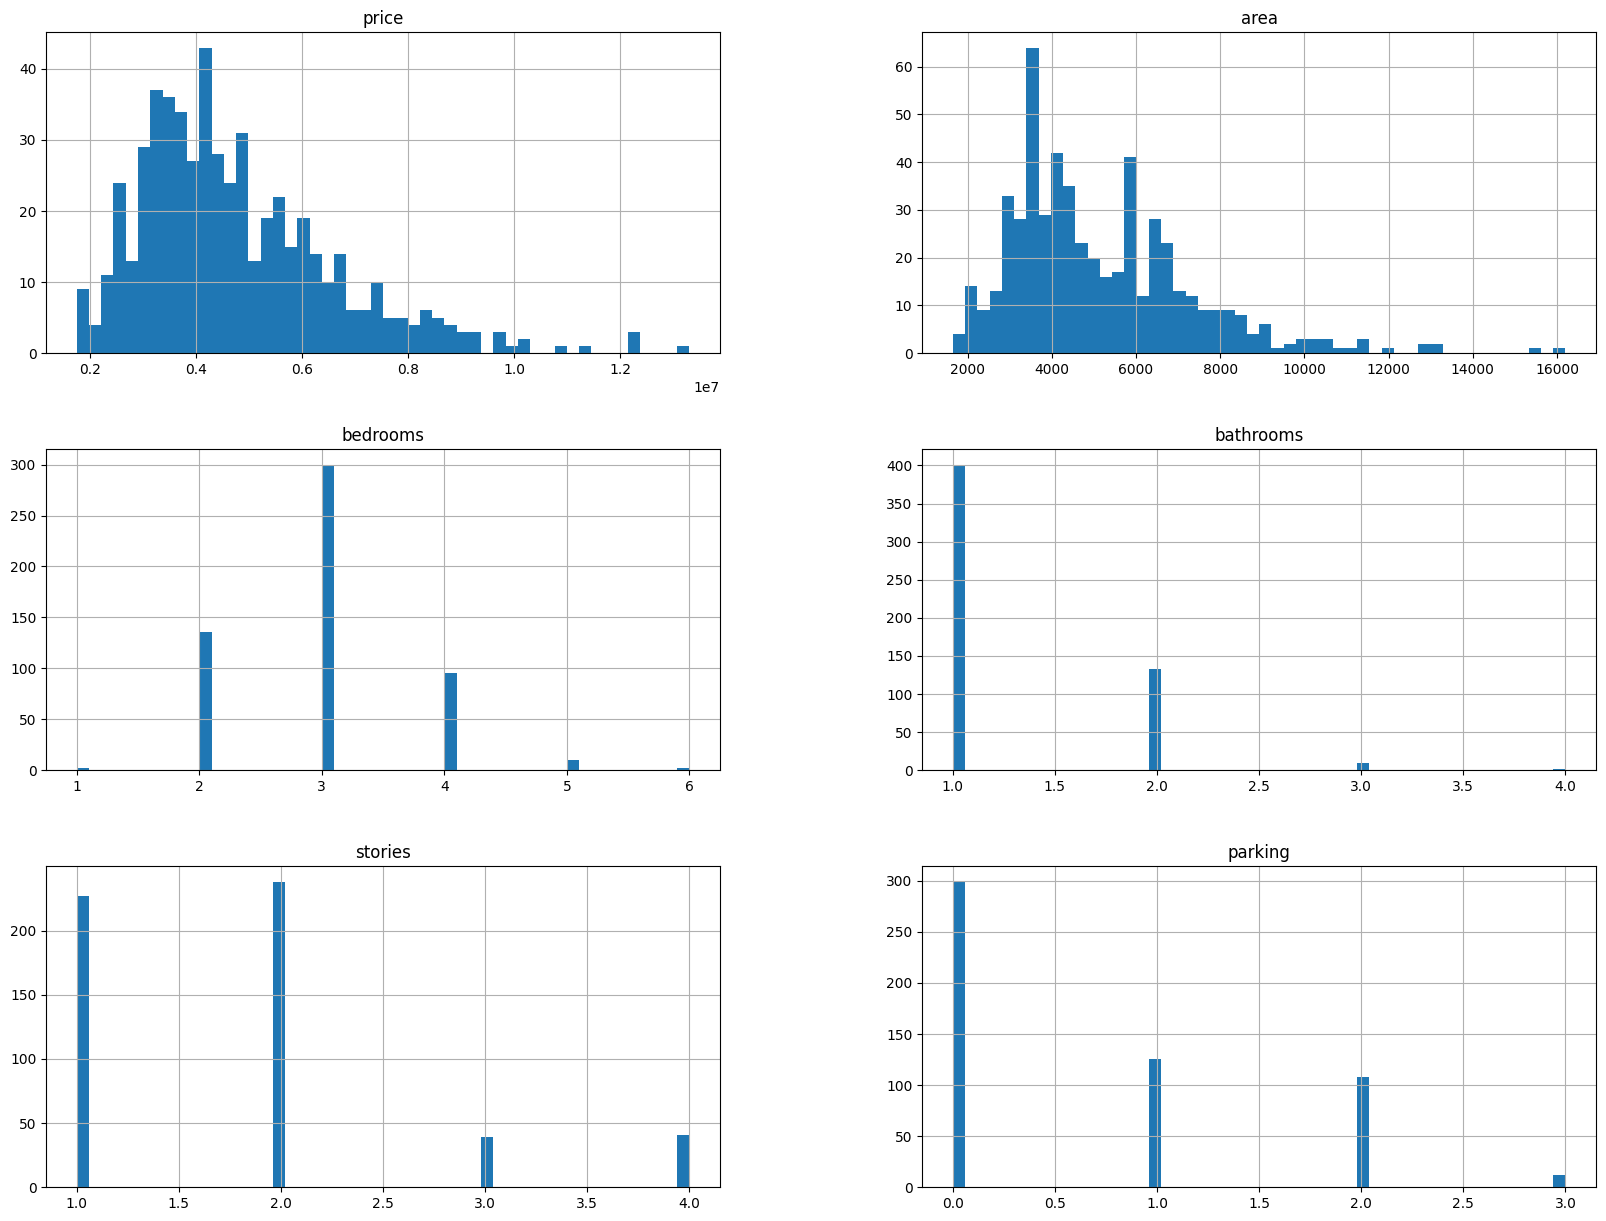

In [13]:
#Plotting histograms for all numerical columns in the dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

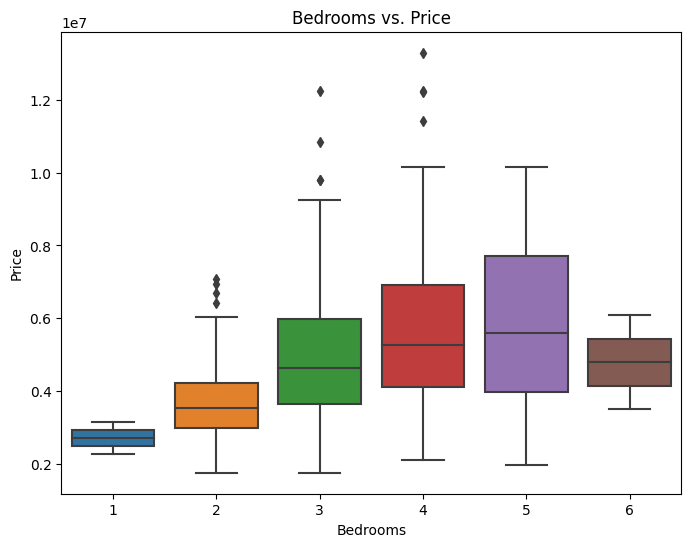

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

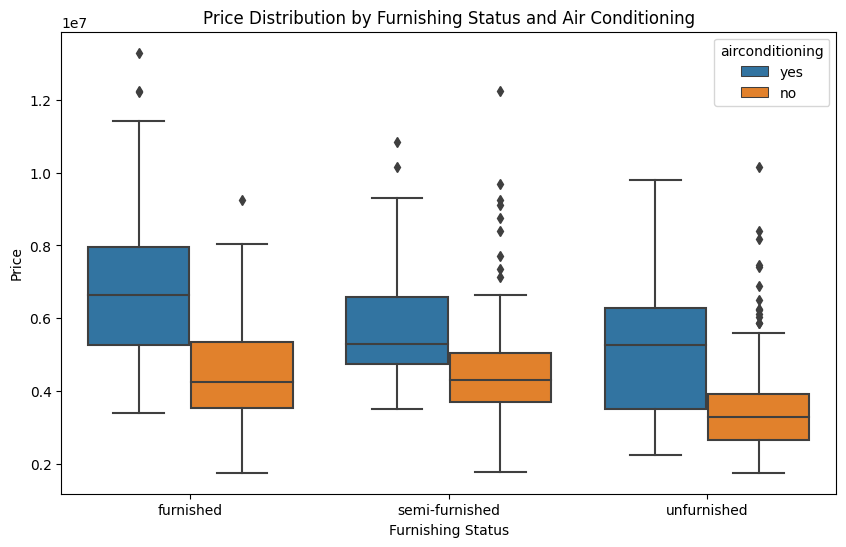

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="furnishingstatus", y="price", hue="airconditioning", data=df)
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Price Distribution by Furnishing Status and Air Conditioning")
plt.show()

In [16]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
# Drop the duplicates
df = df.drop_duplicates()
# Checking the shape of the data after dropping duplicates
print("Shape of DataFrame After Removing Duplicates: ", df.shape)

Number of duplicate rows: 0
Shape of DataFrame After Removing Duplicates:  (545, 13)


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [20]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [24]:
furnishing_status_ = pd.get_dummies(df['furnishingstatus'], prefix='furnishing')
data = pd.concat([df, furnishing_status_], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)

In [25]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [26]:
X = data.drop('price', axis=1)
y = data['price']

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
# Feature selection
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [30]:
X_new

array([[7420,    2],
       [8960,    3],
       [9960,    2],
       ...,
       [3620,    0],
       [2910,    0],
       [3850,    0]])

In [31]:
print("X shape after chi-squared feature selection: ", X_new.shape)

X shape after chi-squared feature selection:  (545, 2)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
# Build a regression dataset
X, y = make_regression(noise=4, random_state=0)
# LassoCV: Lasso linear model with iterative fitting along a regularization path
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [63]:
model=LinearRegression()

In [64]:
model.fit(X_train, y_train)


LinearRegression()

In [65]:
y_pred = model.predict(X_test)


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [67]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)
accuracy=r2

Mean Squared Error (MSE): 5130.028432117405
Mean Absolute Error (MAE): 52.914507779350096
R-squared Score: 0.589459097056281


In [59]:
accuracy

0.6297287242010762

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [43]:
model=LinearRegression()

In [44]:
model.fit(X_train, y_train)


LinearRegression()

In [45]:
y_pred = model.predict(X_test)


In [60]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)
accuracy=r2

Mean Squared Error (MSE): 1871562173734.8992
Mean Absolute Error (MAE): 1045355.1926605505
R-squared Score: 0.6297287242010762


In [47]:
accuracy

0.316107610436018

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
# Build a regression dataset
X, y = make_regression(noise=4, random_state=0)
# LassoCV: Lasso linear model with iterative fitting along a regularization path
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)